# Importing the libraries

In [1]:
import pyforest
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
# To handle the special characters in our dataset(@$#) we use special type of encoding ('ISO-8859-1')
df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

<IPython.core.display.Javascript object>

# Visualizing the DataFrame

In [3]:
df.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [33]:
df.tail(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
490,Jonah,augue@risusNuncac.co.uk,Myanmar,1,45.752698,63722.00164,10711.444720,316128.4002,41352.47071
491,Merrill,dolor.sit@turpisIn.com,Egypt,1,50.197205,78518.21527,10072.482980,294506.0844,52785.16947
492,Nolan,Donec.at@neccursus.co.uk,Latvia,0,55.087720,72424.80112,9831.184792,523680.7699,60117.67886
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,0,42.900187,77665.17195,13308.879320,349588.5608,47760.66427
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,0,51.767418,77345.61633,6736.751680,665099.1390,64188.26862
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


# Checking Null Value

In [34]:
df.count().isnull()

Customer Name          False
Customer e-mail        False
Country                False
Gender                 False
Age                    False
Annual Salary          False
Credit Card Debt       False
Net Worth              False
Car Purchase Amount    False
dtype: bool

# Plotting the Bivariate Distribution

<IPython.core.display.Javascript object>

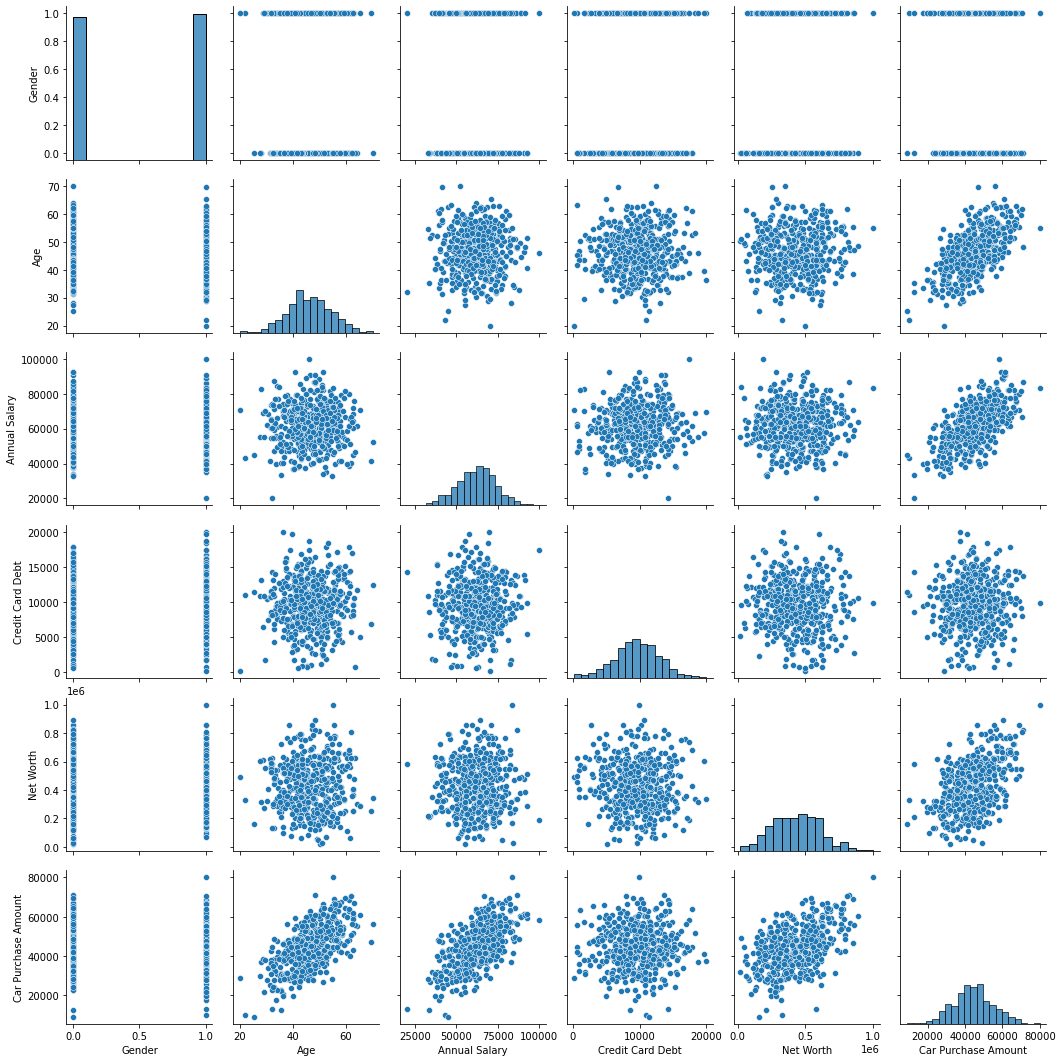

In [5]:
sns.pairplot(df)

# DATA MUNGING

In [6]:
#Droping the colums which does'nt make any sense to the data (Customer Name, Email , Country) as well as the o/p

In [7]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [8]:
X.head(10)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
5,1,56.824893,68499.85162,14179.472440,428485.3604
6,1,46.607315,39814.52200,5958.460188,326373.1812
7,1,50.193016,51752.23445,10985.696560,629312.4041
8,0,46.584745,58139.25910,3440.823799,630059.0274
9,1,43.323782,53457.10132,12884.078680,476643.3544


In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
y = df['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [11]:
type(y)

pandas.core.series.Series

In [12]:
X.shape

(500, 5)

In [13]:
y.shape

(500,)

# Scaling/Normalizing the data

In [14]:
# Normalizing our data with minmax scaling for better performence and convergence
# The values will range between 0-1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y=y.values.reshape(-1,1) # To avoid reshaping error after that we can fit_transform() the data
y_scaled = scaler.fit_transform(y)

In [15]:
X_scaled.shape

(500, 5)

In [16]:
y.shape

(500, 1)

In [17]:
y_scaled.shape

(500, 1)

In [18]:
scaler.data_max_

array([80000.])

In [19]:
scaler.data_min_

array([9000.])

# Model Training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=42)
#default test_size=0.25

<IPython.core.display.Javascript object>

In [21]:
X_train.shape, y_train.shape

((400, 5), (400, 1))

In [22]:
X_test.shape, y_test.shape

((100, 5), (100, 1))

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))


#model=Sequential()
#model.add(Dense(40, input_dim=5, activation='relu'))
#model.add(Dense(40, activation='relu'))
#model.add(Dense(40, activation='linear')) 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=25,  verbose=1, validation_split=0.2, callbacks= EarlyStopping(monitor='val_loss', patience= 5))
#epochs_hist=model.fit(X_train, y_train, epochs=10, batch_size=25, verbose=1, validation_split=0.2 )


Epoch 1/100
13/13 [==============================] - 3s 197ms/step - loss: 0.3249 - val_loss: 0.1028
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0764 - val_loss: 0.0108
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0137 - val_loss: 0.0160
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0162 - val_loss: 0.0098
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0119 - val_loss: 0.0076
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0085 - val_loss: 0.0070
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.004

Epoch 79/100
13/13 [==============================] - 0s 6ms/step - loss: 1.0144e-04 - val_loss: 1.7035e-04
Epoch 80/100
13/13 [==============================] - 0s 6ms/step - loss: 9.7153e-05 - val_loss: 1.6805e-04
Epoch 81/100
13/13 [==============================] - 0s 6ms/step - loss: 1.0626e-04 - val_loss: 1.6361e-04
Epoch 82/100
13/13 [==============================] - 0s 6ms/step - loss: 9.8142e-05 - val_loss: 1.6404e-04
Epoch 83/100
13/13 [==============================] - 0s 6ms/step - loss: 1.1449e-04 - val_loss: 1.5459e-04
Epoch 84/100
13/13 [==============================] - 0s 6ms/step - loss: 1.3283e-04 - val_loss: 1.5796e-04
Epoch 85/100
13/13 [==============================] - 0s 7ms/step - loss: 7.5176e-05 - val_loss: 1.6240e-04
Epoch 86/100
13/13 [==============================] - 0s 6ms/step - loss: 8.1066e-05 - val_loss: 1.6823e-04
Epoch 87/100
13/13 [==============================] - 0s 6ms/step - loss: 1.0912e-04 - val_loss: 1.4617e-04
Epoch 88/100
13/13 [========

# Model Evaluation

In [26]:
epochs_hist.history.keys() # That gives us all the information contains in the epochs_hist

dict_keys(['loss', 'val_loss'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

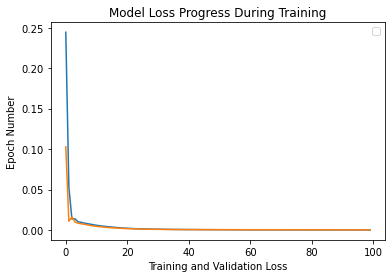

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])# To visualize 'loss' & 'val_loss'
plt.title('Model Loss Progress During Training')
plt.xlabel('Training and Validation Loss')
plt.ylabel('Epoch Number')
plt.legend('Training Loss', 'Validation Loss')

# Prediction

In [28]:
# Based on gender, Age, Annual Salary, Credit Card depth, Net Worth
X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
#X_test_sample = np.array([[1, 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

y_predict_sample = model.predict(X_test_sample)

#print('Expected Car Purchase Amount=', y_predict_sample)
y_predict_sample_orig = scaler.inverse_transform(y_predict_sample)
print('Expected Car Purchase Amount=', y_predict_sample_orig)


<IPython.core.display.Javascript object>

Expected Car Purchase Amount= [[35118.957]]
